In [19]:
import pandas as pd
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning and statistical modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score, precision_score, recall_score, classification_report

In [20]:
df = pd.read_csv('./Full dataset with additional features.xlsx - Sheet1.csv')

In [21]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,...,Sub_Category_Popularity,Founding_Team_Size,Previous_Campaigns,Success_Rate_Previous_Campaigns,Social_Media_Following,Relevant_Experience_Grade,Backer_Sharing_Rate,Backers_Relatives_Friends,Engagement_Rate,K_Factor
0,1000117861,Ledr workbook: one tough journal!,Product Design,Design,USD,10/8/16 0:00,1000.0,9/7/16 13:14,47266.0,successful,...,0.685678,5,3.0,0.916693,8587.0,0.533150,0.475654,0.743071,0.344255,0.727823
1,1000190427,Seas of Iron,Tabletop Games,Games,USD,7/19/13 0:00,3000.0,6/19/13 3:16,8105.0,successful,...,0.199404,1,2.0,0.672988,5674.0,0.594452,0.536033,0.883633,0.208146,1.544498
2,1000232288,Empires at Sea,Tabletop Games,Games,USD,6/23/15 0:00,25000.0,5/24/15 12:47,37199.0,successful,...,0.983771,1,2.0,0.616195,9005.0,0.190390,0.688681,0.133490,0.267773,0.543241
3,1000465399,DAYTRADER - A Financial Board Game,Tabletop Games,Games,USD,3/13/13 0:00,19500.0,2/5/13 16:16,20269.0,successful,...,0.155279,5,1.0,0.085473,3003.0,0.192034,0.719438,0.754568,0.049975,1.584836
4,1000519001,Wordwright: reÂ·deÂ·finÂ·ing word play,Tabletop Games,Games,USD,12/29/15 0:00,2000.0,11/21/15 14:12,14794.0,successful,...,0.598366,4,2.0,0.524714,7046.0,0.955941,0.884261,0.030640,0.480158,1.863128


In [22]:
# Check for missing data
missing_data = df.isnull().sum()

# Display the missing data
print(missing_data)

ID                                 0
name                               0
category                           0
main_category                      0
currency                           0
deadline                           0
goal                               0
launched                           0
pledged                            0
state                              0
backers                            0
country                            0
usd_pledged_real                   0
usd_goal_real                      0
y_variable                         0
Funding_Growth_Rate                0
Media_Richness_Score               0
Sub_Category_Popularity            0
Founding_Team_Size                 0
Previous_Campaigns                 0
Success_Rate_Previous_Campaigns    0
Social_Media_Following             0
Relevant_Experience_Grade          0
Backer_Sharing_Rate                0
Backers_Relatives_Friends          0
Engagement_Rate                    0
K_Factor                           0
d

In [23]:
print(df.dtypes)

ID                                   int64
name                                object
category                            object
main_category                       object
currency                            object
deadline                            object
goal                               float64
launched                            object
pledged                            float64
state                               object
backers                              int64
country                             object
usd_pledged_real                   float64
usd_goal_real                      float64
y_variable                           int64
Funding_Growth_Rate                float64
Media_Richness_Score               float64
Sub_Category_Popularity            float64
Founding_Team_Size                   int64
Previous_Campaigns                 float64
Success_Rate_Previous_Campaigns    float64
Social_Media_Following             float64
Relevant_Experience_Grade          float64
Backer_Shar

In [25]:
df['deadline'] = pd.to_datetime(df['deadline'])
df['launched'] = pd.to_datetime(df['launched'])

# Select all columns with dtype 'object'
to_encode = list(df.select_dtypes(include=['object']).columns)

# Exclude the column 'name'
to_encode = [col for col in to_encode if col != 'name']

print(to_encode)

['category', 'main_category', 'currency', 'state', 'country']


In [26]:
df[to_encode].nunique()

category         31
main_category     3
currency          1
state             5
country           1
dtype: int64

In [27]:
from sklearn.preprocessing import OneHotEncoder

# Create the encoder:
encoder = OneHotEncoder(handle_unknown="error", sparse=False)

# Apply the encoder:
df_enc = pd.DataFrame(encoder.fit_transform(df[to_encode]))


# Reinstate the original column names:
df_enc.columns = encoder.get_feature_names_out(to_encode)
df_enc.head()

,category_3D Printing,category_Apps,category_Architecture,category_Camera Equipment,category_Civic Design,category_DIY Electronics,category_Design,category_Fabrication Tools,category_Flight,category_Gadgets,...,main_category_Design,main_category_Games,main_category_Technology,currency_USD,state_canceled,state_failed,state_live,state_successful,state_suspended,country_US
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [28]:
# Concatenate with the encoded dataframe:
df = df.join(df_enc)

# Remove the original categorical features from X_train and X_test:
df.drop(columns = to_encode ,axis=1, inplace=True)

In [29]:
print(df.columns)
print(df.shape)

Index(['ID', 'name', 'deadline', 'goal', 'launched', 'pledged', 'backers',
       'usd_pledged_real', 'usd_goal_real', 'y_variable',
       'Funding_Growth_Rate', 'Media_Richness_Score',
       'Sub_Category_Popularity', 'Founding_Team_Size', 'Previous_Campaigns',
       'Success_Rate_Previous_Campaigns', 'Social_Media_Following',
       'Relevant_Experience_Grade', 'Backer_Sharing_Rate',
       'Backers_Relatives_Friends', 'Engagement_Rate', 'K_Factor',
       'category_3D Printing', 'category_Apps', 'category_Architecture',
       'category_Camera Equipment', 'category_Civic Design',
       'category_DIY Electronics', 'category_Design',
       'category_Fabrication Tools', 'category_Flight', 'category_Gadgets',
       'category_Games', 'category_Gaming Hardware', 'category_Graphic Design',
       'category_Hardware', 'category_Interactive Design',
       'category_Live Games', 'category_Makerspaces', 'category_Mobile Games',
       'category_Playing Cards', 'category_Product Design',

In [30]:
# Assuming df is your DataFrame
columns_to_convert = [
    'goal',
    'pledged',
    'usd_pledged_real',
    'usd_goal_real',
    'Funding_Growth_Rate',
    'Media_Richness_Score',
    'Sub_Category_Popularity',
    'Previous_Campaigns',
    'Success_Rate_Previous_Campaigns',
    'Social_Media_Following',
    'Relevant_Experience_Grade',
    'Backer_Sharing_Rate',
    'Backers_Relatives_Friends',
    'Engagement_Rate',
    'K_Factor', 'deadline', 'launched'
]

# Converting specified columns to int
for column in columns_to_convert:
    df[column] = df[column].astype(int)

# Verify the changes
print(df.dtypes)

ID                    int64
name                 object
deadline              int64
goal                  int64
launched              int64
                     ...   
state_failed        float64
state_live          float64
state_successful    float64
state_suspended     float64
country_US          float64
Length: 63, dtype: object


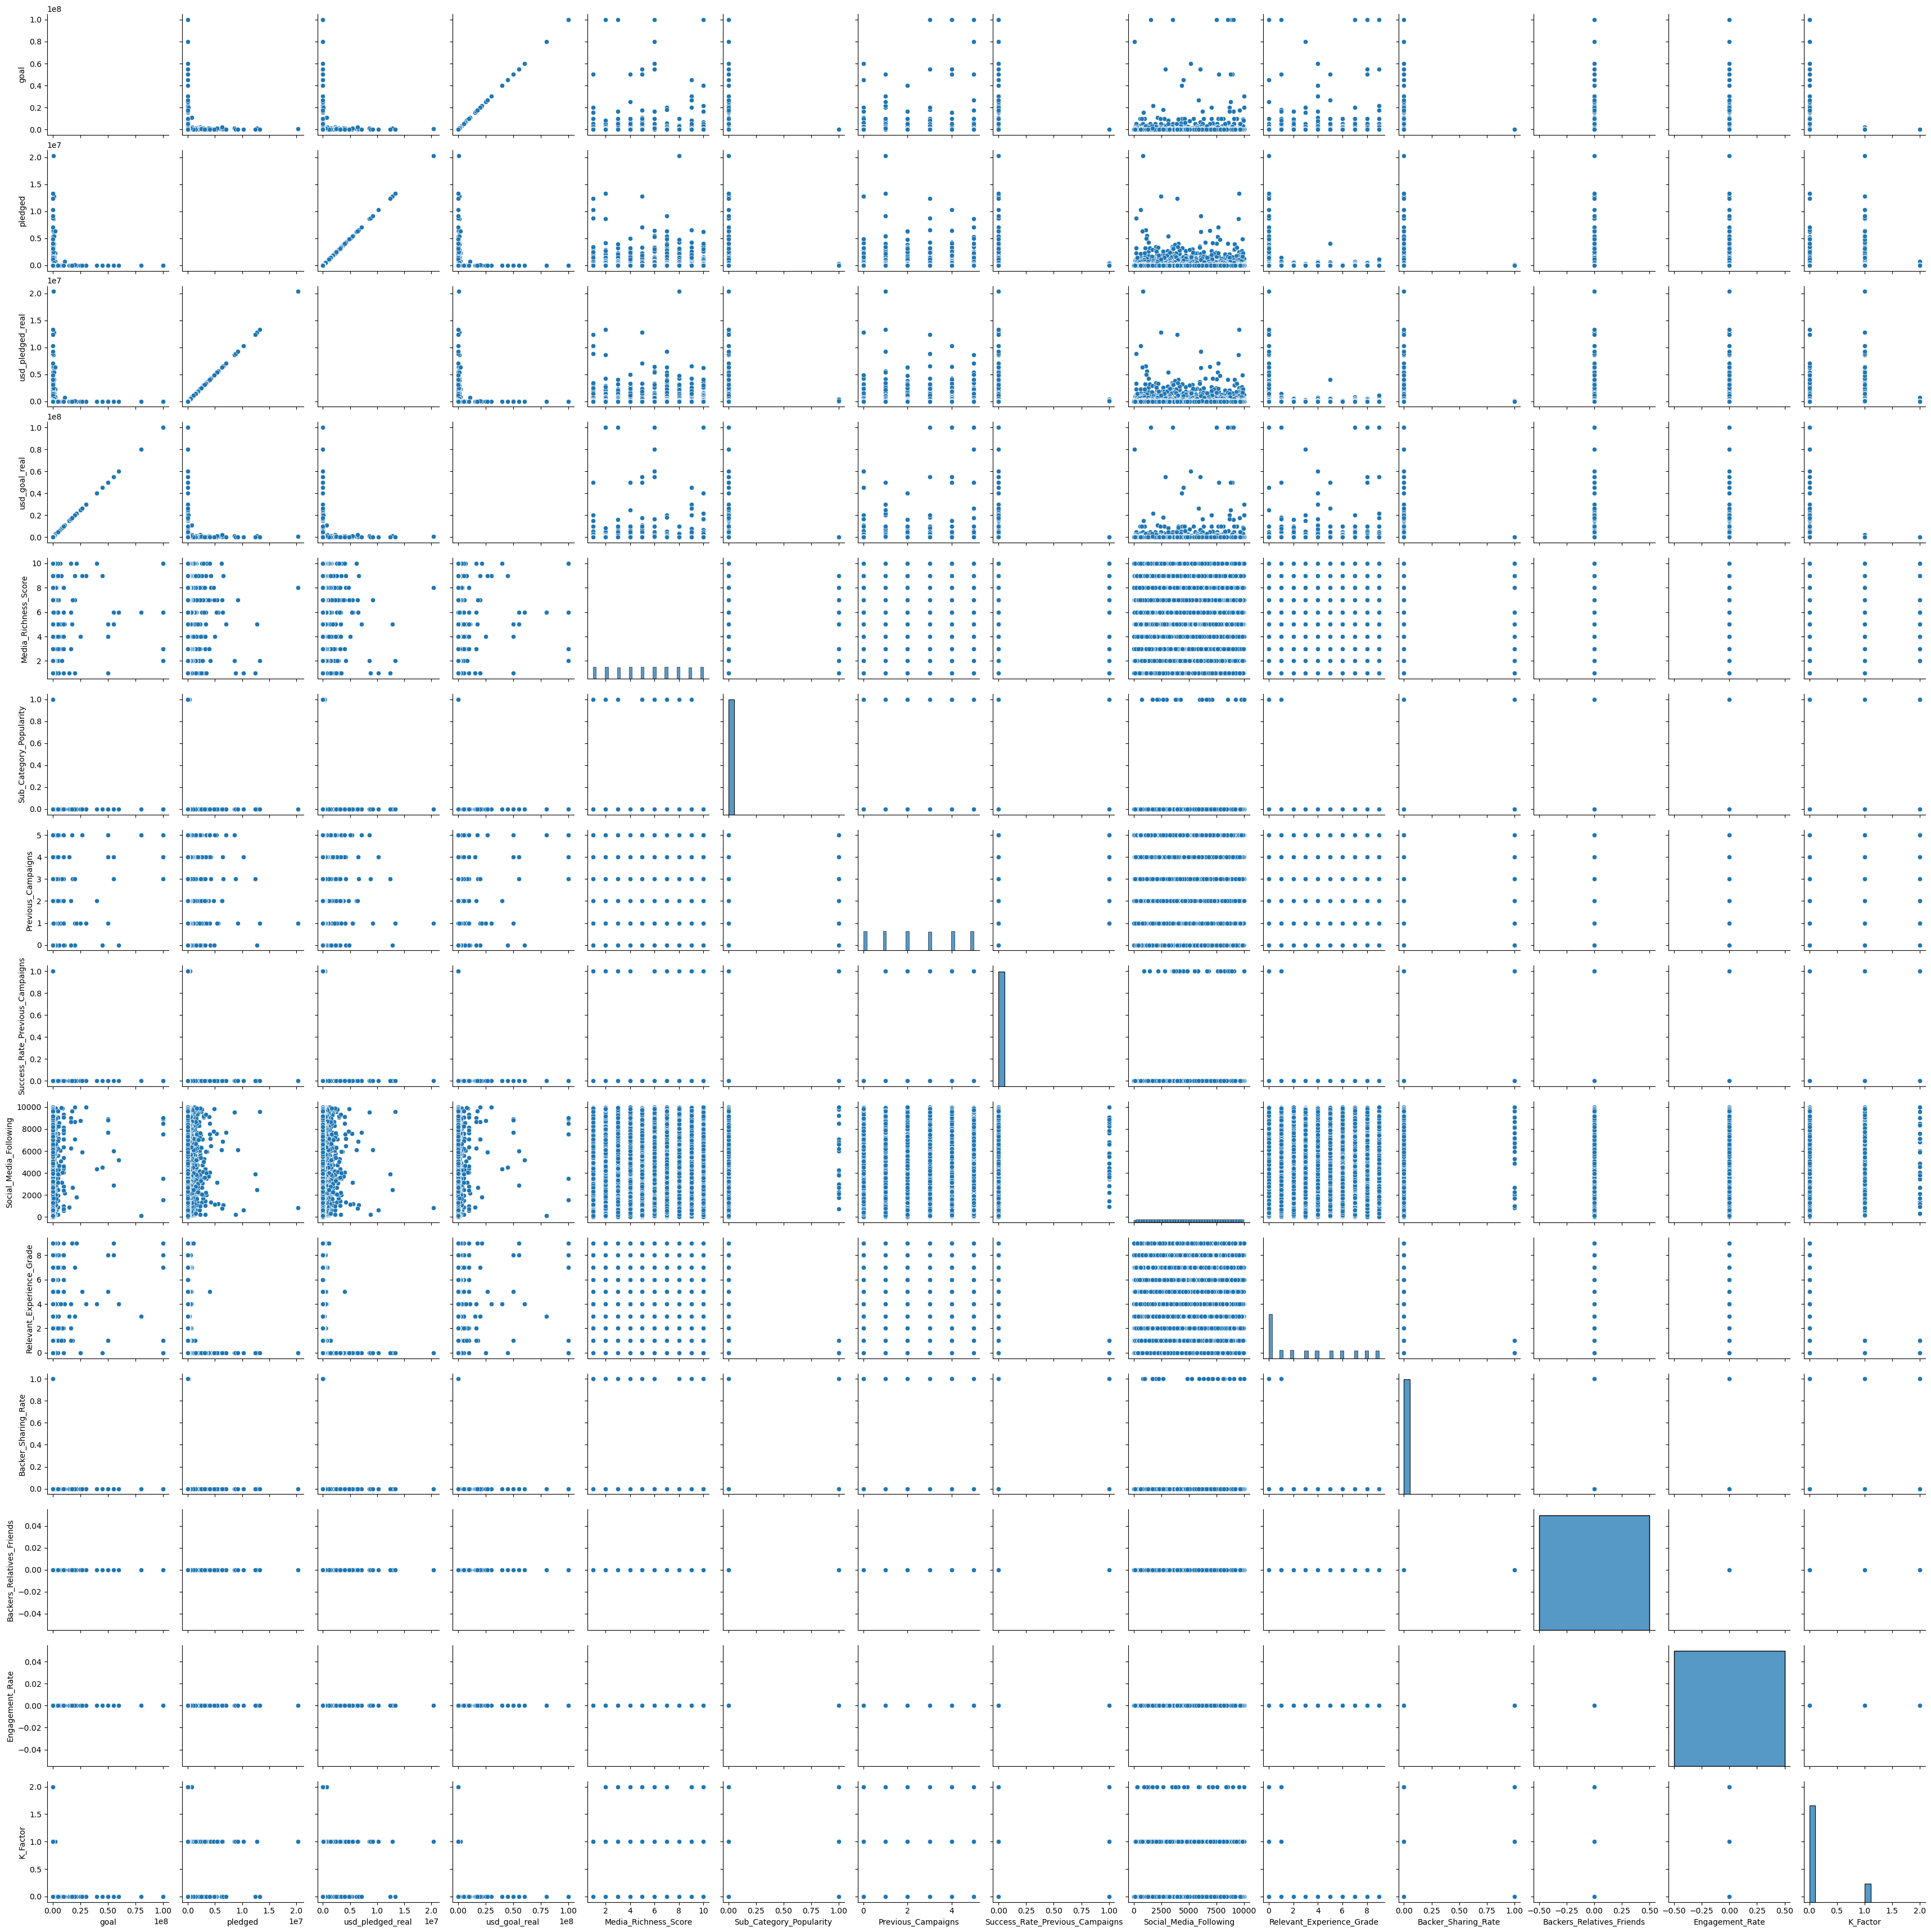

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns for the pairplot
numerical_cols = [
    'goal',
    'pledged',
    'usd_pledged_real',
    'usd_goal_real',
    'Media_Richness_Score',
    'Sub_Category_Popularity',
    'Previous_Campaigns',
    'Success_Rate_Previous_Campaigns',
    'Social_Media_Following',
    'Relevant_Experience_Grade',
    'Backer_Sharing_Rate',
    'Backers_Relatives_Friends',
    'Engagement_Rate',
    'K_Factor'
]

# Create the pairplot
sns.pairplot(df[numerical_cols])

# Show the plot
plt.show()

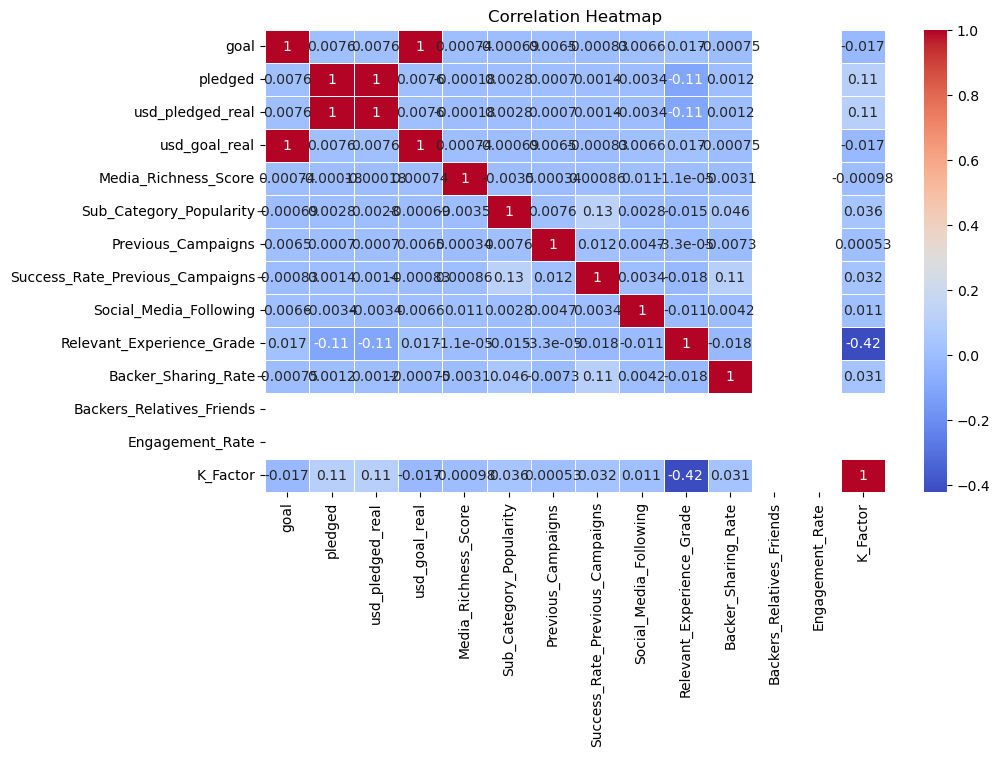

In [32]:
# Calculate the correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Show the plot
plt.title('Correlation Heatmap')
plt.show()

In [33]:
print(df.dtypes)

ID                    int64
name                 object
deadline              int64
goal                  int64
launched              int64
                     ...   
state_failed        float64
state_live          float64
state_successful    float64
state_suspended     float64
country_US          float64
Length: 63, dtype: object


In [34]:
X = df.drop(columns=['name', 'y_variable', 'ID'], axis=1)
y = df['y_variable']

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [113]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def train_test_knn(X_train, X_test, y_train, y_test, k):
    '''
    Fit a k Nearest Neighbors classifier to the training data X_train, y_train.
    Return the accuracy, precision, recall, and F1 score of resulting predictions on the test data.
    '''
    
    # 1. Create the KNeighborsClassifier model object below and assign to variable 'model'
    model = KNeighborsClassifier(n_neighbors=k)

    # 2. Fit the model to the training data below
    model.fit(X_train, y_train)
    
    # 3. Make predictions on the test data below and assign the result to the variable 'class_label_predictions'
    class_label_predictions = model.predict(X_test)

    # 4. Compute the accuracy, precision, recall, and F1 score
    acc_score = accuracy_score(y_test, class_label_predictions)
    precision = precision_score(y_test, class_label_predictions, average='weighted', zero_division=1)
    recall = recall_score(y_test, class_label_predictions, average='weighted', zero_division=1)
    f1 = f1_score(y_test, class_label_predictions, average='weighted', zero_division=1)
    
    return acc_score, precision, recall, f1

k_values = [10, 100, 1000]

results = []

for k in k_values:
    acc_score, precision, recall, f1 = train_test_knn(X_train, X_test, y_train, y_test, k)
    print(f'k={k}, Accuracy: {acc_score}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}')
    results.append({'k': k, 'Accuracy': acc_score, 'Precision': precision, 'Recall': recall, 'F1 Score': f1})

# Display the results
results_df = pd.DataFrame(results)
print(results_df)


k=10, Accuracy: 0.9906445672191528, Precision: 0.9907320913416698, Recall: 0.9906445672191528, F1 Score: 0.9859888346936437
k=100, Accuracy: 0.9906445672191528, Precision: 0.9907320913416698, Recall: 0.9906445672191528, F1 Score: 0.9859888346936437
k=1000, Accuracy: 0.9906445672191528, Precision: 0.9907320913416698, Recall: 0.9906445672191528, F1 Score: 0.9859888346936437
      k  Accuracy  Precision    Recall  F1 Score
0    10  0.990645   0.990732  0.990645  0.985989
1   100  0.990645   0.990732  0.990645  0.985989
2  1000  0.990645   0.990732  0.990645  0.985989


In [109]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score

print('Begin Random Forest Implementation...')
# 1. Create the RandomForestClassifier model object below and assign to variable 'rf_20_model'

rf_20_model = RandomForestClassifier(criterion='entropy', n_estimators=10)

# 2. Fit the model to the training data below

rf_20_model.fit(X_train, y_train)

# 3. Make predictions on the test data using the predict() method and assign the result to a
# list named 'rf_20_predictions' below

rf_20_predictions = rf_20_model.predict(X_test)

# 4. Calculate F1 score and accuracy for rf_20_model

f1_score_20 = f1_score(y_test, rf_20_predictions, average='weighted')
accuracy_score_20 = accuracy_score(y_test, rf_20_predictions)
recall = recall_score(y_test, rf_20_predictions)
precision = precision_score(y_test, rf_20_predictions)

print(f'F1 Score for 10 estimators: {f1_score_20}')
print(f'Accuracy Score for 10 estimators: {accuracy_score_20}')
print(f'Recall Score for 10 estimators: {recall}')
print(f'Precision Score for 10 estimators: {precision}')

print('End')

Begin Random Forest Implementation...
F1 Score for 10 estimators: 0.9885129438971377
Accuracy Score for 10 estimators: 0.9917495395948435
Recall Score for 10 estimators: 0.11811023622047244
Precision Score for 10 estimators: 1.0
End


In [112]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import f1_score, accuracy_score
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Assuming X_train, y_train, X_test, and y_test are already defined and preprocessed

# Determine the number of unique classes
num_classes = max(y_train.max(), y_test.max()) + 1  # Ensure we cover all classes
y_train_categorical = to_categorical(y_train, num_classes)
y_test_categorical = to_categorical(y_test, num_classes)

# Manually split the data into training and validation sets
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train_categorical, test_size=0.2, random_state=42)

print('Begin Neural Network Implementation...')

# Create the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))  # Use 'sigmoid' for binary classification

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model to the training data
model.fit(X_train_split, y_train_split, epochs=20, batch_size=32, validation_data=(X_val_split, y_val_split))

# Make predictions on the test data
y_pred_prob = model.predict(X_test)
y_pred = y_pred_prob.argmax(axis=1)

# Calculate F1 score and accuracy
f1_score_nn = f1_score(y_test, y_pred, average='weighted', zero_division=1)
accuracy_score_nn = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)

print(f'F1 Score for Neural Network: {f1_score_nn}')
print(f'Accuracy Score for Neural Network: {accuracy_score_nn}')
print(f'Precision Score for Neural Network: {precision}')
print(f'Recall Score for Neural Network: {recall}')

print('End')


Begin Neural Network Implementation...
Epoch 1/20
1358/1358 [==============================] - 4s 2ms/step - loss: 1747668900511744.0000 - accuracy: 0.9790 - val_loss: 2328958901157888.0000 - val_accuracy: 0.9902
Epoch 2/20
1358/1358 [==============================] - 3s 2ms/step - loss: 1111198435115008.0000 - accuracy: 0.9799 - val_loss: 256496503881728.0000 - val_accuracy: 0.9902
Epoch 3/20
1358/1358 [==============================] - 3s 2ms/step - loss: 731088192274432.0000 - accuracy: 0.9797 - val_loss: 347992712282112.0000 - val_accuracy: 0.9902
Epoch 4/20
1358/1358 [==============================] - 4s 3ms/step - loss: 470763647795200.0000 - accuracy: 0.9797 - val_loss: 69571625091072.0000 - val_accuracy: 0.9902
Epoch 5/20
1358/1358 [==============================] - 3s 3ms/step - loss: 312705697185792.0000 - accuracy: 0.9798 - val_loss: 155942377226240.0000 - val_accuracy: 0.9902
Epoch 6/20
1358/1358 [==============================] - 3s 2ms/step - loss: 238375365771264.0000 - 

In [106]:
# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model using sklearn
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Fit the model using statsmodels to get the summary
X_train_const = sm.add_constant(X_train)  # Add constant term for intercept
sm_model = sm.OLS(y_train, X_train_const).fit()

# Print the summary
print(sm_model.summary())

# Print the sklearn evaluation metrics
print('Mean Squared Error:', mse)
print('R-squared:', r2)

                            OLS Regression Results                            
Dep. Variable:             y_variable   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     7.409
Date:                Sun, 21 Jul 2024   Prob (F-statistic):           5.87e-05
Time:                        20:01:19   Log-Likelihood:                 48365.
No. Observations:               54300   AIC:                        -9.672e+04
Df Residuals:                   54296   BIC:                        -9.669e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
deadline  

In [36]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)
